In [2]:
#2022/6/14
import numpy as np
import matplotlib.pyplot as plt
import copy        

In [3]:
# st Transform
class Transformation():
    
    def __init__(self):
        
        self.color_dict={0:"magenta",1:"dimgray",2:"cyan"}
        self.type_dict={0:"Aluthge",1:"Duggal",2:"Mean"}
        self.type_dict_2= {v: k for k, v in self.type_dict.items()}

    def Epoch(self,T): # one iteration 
        
        w,sigma,v_h=np.linalg.svd(T)    
        self.length=len(T)
        sigma_s_list=[]
        sigma_t_list=[]
        for i in range(0,self.length):
            sigma_s_list.append(sigma[i]**self.s)
            sigma_t_list.append(sigma[i]**self.t)
        
        sigma_s=np.diag(sigma_s_list)
        sigma_t=np.diag(sigma_t_list)
        sigma=np.diag(sigma)
        
        v=v_h.H
        
        sigma_pinv=np.linalg.pinv(sigma)
        u=w@sigma@sigma_pinv@v_h
        
        T_st=v@sigma_s@v_h@w@sigma@sigma_pinv@sigma_t@v_h
        
        
        return T_st #one epoch output
             
    def Transform(self,T,n=1,s=1/2,t=1/2): # n : iteration count 
        self.s=s
        self.t=t
        self.T=T
        self.n=n
        
        before=copy.deepcopy(self.T)
        
        self.st=[T]
            
        for i in range(self.n):
                
            after=self.Epoch(before)
            self.st.append(after)
            before=after
            
    def Normal_calculator(self): 
        self.norm_info=[] #list of Frobenius norm of each transformation output matrix
        self.normal_info=[] #list of Frobenius norm of each transformation output matrix
        
        for j in self.st:
            norm=np.linalg.norm(j)
            distance_matrix=np.abs(j@j.H-j.H@j)
            distance=np.linalg.norm(distance_matrix)
            self.normal_info.append(distance)
            self.norm_info.append(norm)
    
    
    def Normal_plot(self): # plot that dipicts Frobenius norm of T(T^*)-(T^*)T

        self.total_fig, self.total_ax=plt.subplots(1,1)
        
        self.total_ax.plot(range(self.n+1),self.normal_info,color="b",alpha=0.5,marker="o",linestyle="dashed")
        self.total_ax.set_title("Normal Characteristic")
        
        self.total_fig.set_size_inches((16,4))
        self.total_ax.grid(axis='x', color='0.95',linestyle="--")
        
    def Process(self,k):
        
        M=self.st[k-1]
        print("Input\n",np.round(M,4),"\n")
        
        w,sigma,v_h=np.linalg.svd(M)   
        sigma_s_list=[]
        sigma_t_list=[]
        for i in range(0,self.length):
            sigma_s_list.append(sigma[i]**self.s)
            sigma_t_list.append(sigma[i]**self.t)
        
        sigma_s=np.diag(sigma_s_list)
        sigma_t=np.diag(sigma_t_list)
        sigma=np.diag(sigma)
        
        v=v_h.H
                
        print("W\n",np.round(w,4),"\n")
        print("Sigma\n",np.round(sigma,4),"\n")
        print("V_h\n",np.round(v_h,4),"\n")
        print("W\Sigma V^*\n",np.round(w@sigma@v_h,4),"\n")
        print("WV^*\n",np.round(w@v_h,4),"\n")
        print("V\n",v,"\n")
        
        sigma_pinv=np.linalg.pinv(sigma)
        u=w@sigma@sigma_pinv@v_h
        print("U=W\Sigma\Sigma_pinv V^*\n",np.round(u,4),"\n")
        
        T_abs=v@sigma@v_h
        
        print("|T|\n",np.round(T_abs,4),"\n")
        
        print("U|T|\n",np.round(u@T_abs,4),"\n")

        
        T_st=v@sigma_s@v_h@w@sigma@sigma_pinv@sigma_t@v_h
        
        print("T_st(a)\n",np.round(T_st,4),"\n")
        
        print("result from our class(b)\n",np.round(self.st[k],4))
        print("If a!=b, Error.. ; If that happens, please email us")
        
        
        

### API
#### 1. Transformation(T,n,s,t) : iterate n times for transformation.($T_{st}=|T|^sU|T|^t$).
    
    input:
        T : matrix (numpy.Matrix)
        n : number of iteration
        s,t : Defalt 1/2 (Aluthge Transform)
   The output is saved as a list in the following format.
     
   Transfomation.st<= store all matrix from Module.

#### 2. Transfomation.Normal_calculator() : Norm and Normality Calculation Built-in Functions.

   Transfomation.norm_info : A list in which the norm of the Transformation is stored.
   
   Transfomation.normal_info : A list in which normal characteristic - $|T^{*}T-TT^{*}| - $ is stored.
   
#### 3. Transformation.Process(k,Type) : You can check the calculation process of a specific part.
    
    input:
        k : purpose number of repetitions (1<=k<=n)
      
   Lists information from the implementation.

#### 4. Transformation.Plot() : plotting of normal characteristic.
   
   axis X : number of iteration(n)
   
   axis Y : normal characteristic for transformation.

    


*****
see example below.

### Example 

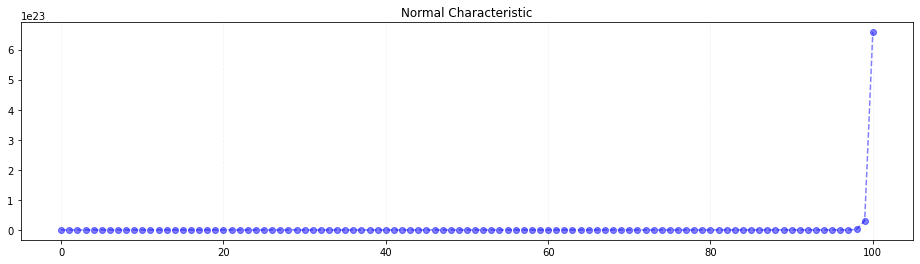

In [22]:
#ex1 
#invertible matrix
T = np.matrix([[0,0,1],[1,1,0],[1,-1,0]])

Ex_1=Transformation() 

Ex_1.Transform(T,n=100,s=0.5,t=0.55) # 행렬, 반복횟수, s,t

Ex_1.Normal_calculator() 

Ex_1.Normal_plot() 

In [5]:
#Ex_1.st

#Ex_1.norm_info

#Ex_1.normal_info

Ex_1.Process(k=10)


Input
 [[ 0.02   -0.0179  1.1517]
 [ 0.8075  0.8331 -0.0055]
 [ 0.8093 -0.8303  0.0282]] 

W
 [[ 0.5401 -0.4983  0.6783]
 [-0.4353 -0.8551 -0.2816]
 [ 0.7203 -0.1431 -0.6787]] 

Sigma
 [[1.1899 0.     0.    ]
 [0.     1.1562 0.    ]
 [0.     0.     1.1251]] 

V_h
 [[ 0.2036 -0.8155  0.5418]
 [-0.706  -0.5057 -0.4958]
 [-0.6783  0.2816  0.6787]] 

W\Sigma V^*
 [[ 0.02   -0.0179  1.1517]
 [ 0.8075  0.8331 -0.0055]
 [ 0.8093 -0.8303  0.0282]] 

WV^*
 [[ 1.700e-03  2.500e-03  1.000e+00]
 [ 7.061e-01  7.081e-01 -3.000e-03]
 [ 7.081e-01 -7.061e-01  6.000e-04]] 

V
 [[ 0.20359172 -0.70601037 -0.67830654]
 [-0.81546892 -0.50568939  0.28158247]
 [ 0.54181256 -0.49581004  0.67868369]] 

U=W\Sigma\Sigma_pinv V^*
 [[ 1.700e-03  2.500e-03  1.000e+00]
 [ 7.061e-01  7.081e-01 -3.000e-03]
 [ 7.081e-01 -7.061e-01  6.000e-04]] 

|T|
 [[ 1.1433e+00  3.0000e-04  1.8100e-02]
 [ 3.0000e-04  1.1762e+00 -2.0900e-02]
 [ 1.8100e-02 -2.0900e-02  1.1518e+00]] 

U|T|
 [[ 0.02   -0.0179  1.1517]
 [ 0.8075  0.8331 -

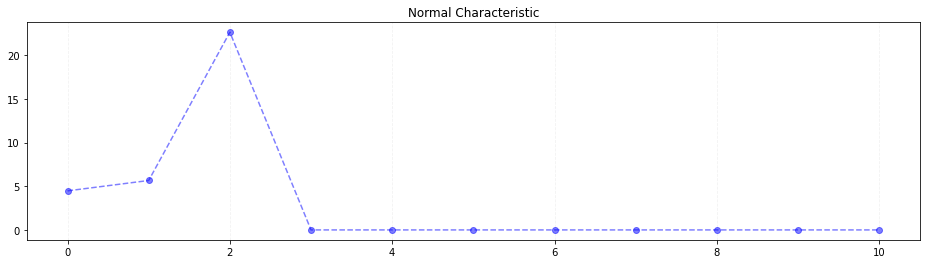

In [6]:
#ex2 코드
#non-invertible matrix
T = np.matrix([[0,1,0,0],[0,0,2,0],[0,0,0,1],[0,0,0,0]])

Ex_2=Transformation()

Ex_2.Transform(T,n=10,s=1,t=1)

Ex_2.Normal_calculator()

Ex_2.Normal_plot()


In [7]:
#Ex_2.total_info

#Ex_2.Aluthge_info

#Ex_2.Duggal_info

#Ex_2.Mean_info

#Ex_2.norm_info

#Ex_2.normal_info

#Ex_2.Process(k=1, Type="Aluthge")



In [8]:
#ex3 코드
#non-invertible matrix
#T = np.matrix([[2,1,-4],[-4,-1,6],[-2,2,-2]])

#Ex_3=Transformation()

#Ex_3.Transform(T,10)

#Ex_3.Normal_calculator()

#Ex_3.Normal_plot()

In [9]:
#Ex_3.total_info

#Ex_3.Aluthge_info

#Ex_3.Duggal_info

#Ex_3.Mean_info

#Ex_3.norm_info

#Ex_3.normal_info

#Ex_3.Process(k=1, Type="Aluthge")



In [10]:
#ex4 코드
#non-invertible matrix

#T = np.matrix([[-5,0,2],[1,-2,3],[6,-2,1]])

#Ex_4=Transformation()

#Ex_4.Transform(T,10)

#Ex_4.Normal_calculator()

#Ex_4.Normal_plot()


In [11]:
#Ex_4.total_info

#Ex_4.Aluthge_info

#Ex_4.Duggal_info

#Ex_4.Mean_info

#Ex_4.norm_info

#Ex_4.normal_info

#Ex_4.Process(k=1, Type="Aluthge")



In [12]:
#ex5 코드
#non-invertible matrix
#T = np.matrix([[0,2,-1],[3,-2,1],[3,2,-1]])

#Ex_5=Transformation()

#Ex_5.Transform(T,10)

#Ex_5.Normal_calculator()

#Ex_5.Normal_plot()

In [13]:
#Ex_5.total_info

#Ex_5.Aluthge_info

#Ex_5.Duggal_info

#Ex_5.Mean_info

#Ex_5.norm_info

#Ex_5.normal_info

#Ex_5.Process(k=1, Type="Aluthge")



In [14]:
#ex6 코드
#normal,invertable matrix
#T = np.matrix([[1j,-2-3j],[2-3j,0]])

#Ex_6=Transformation()

#Ex_6.Transform(T,10)

#Ex_6.Normal_calculator()

#Ex_6.Normal_plot()

#scale : 1e-14

In [15]:
#Ex_6.total_info

#Ex_6.Aluthge_info

#Ex_6.Duggal_info

#Ex_6.Mean_info

#Ex_6.norm_info

#Ex_6.normal_info

#Ex_6.Process(k=1, Type="Aluthge")



In [16]:
#ex7 코드
#non-invertable matrix
#T = np.matrix([[1,2,0],[3,-1,2],[-2,3,-2]])

#Ex_7=Transformation()

#Ex_7.Transform(T,10,check_u=1)

#Ex_7.Normal_calculator()

#Ex_7.Normal_plot()


In [17]:
#Ex_7.total_info

#Ex_7.Aluthge_info

#Ex_7.Duggal_info

#Ex_7.Mean_info

#Ex_7.norm_info

#Ex_7.normal_info

#Ex_7.Process(k=1, Type="Aluthge")

